### KütüphanlerKMeans

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Veri Seti

In [2]:
df = pd.read_csv("./USArrests.csv", index_col =0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


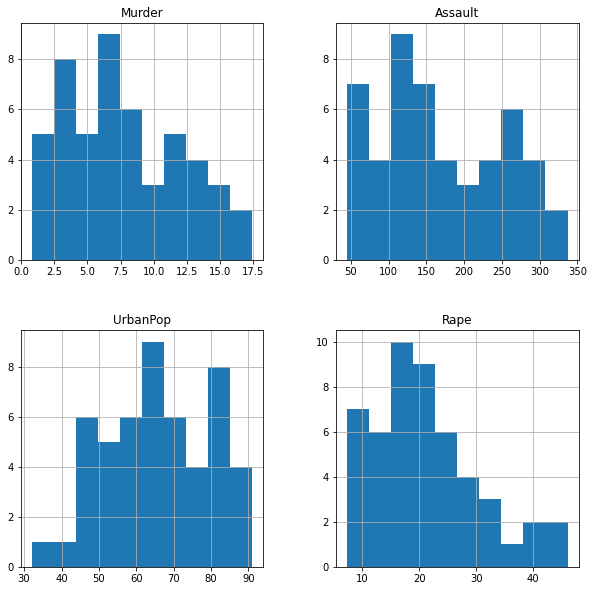

In [5]:
df.hist(figsize=(10,10));

In [9]:
kmeans = KMeans(n_clusters=50)

In [10]:
k_fit = kmeans.fit(df)

In [11]:
k_fit.n_clusters

50

In [12]:
k_fit.cluster_centers_

array([[  4.9, 159. ,  67. ,  29.3],
       [  8.1, 294. ,  80. ,  31. ],
       [  4.3, 102. ,  62. ,  16.5],
       [  2.1,  57. ,  56. ,   9.5],
       [ 11.1, 254. ,  86. ,  26.1],
       [  8.8, 190. ,  50. ,  19.5],
       [ 10. , 263. ,  48. ,  44.5],
       [ 13. , 337. ,  45. ,  16.1],
       [  2.1,  83. ,  51. ,   7.8],
       [ 12.7, 201. ,  80. ,  25.5],
       [ 13.2, 236. ,  58. ,  21.2],
       [ 15.4, 335. ,  80. ,  31.9],
       [  7.4, 159. ,  89. ,  18.8],
       [  3.2, 120. ,  80. ,  22.9],
       [ 14.4, 279. ,  48. ,  22.5],
       [  2.2,  48. ,  32. ,  11.2],
       [  5.3,  46. ,  83. ,  20.2],
       [ 17.4, 211. ,  60. ,  25.8],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.7,  72. ,  66. ,  14.9],
       [  9. , 276. ,  91. ,  40.6],
       [ 16.1, 259. ,  44. ,  17.1],
       [ 12.2, 252. ,  81. ,  46. ],
       [  9. , 178. ,  70. ,  28.2],
       [  4. , 145. ,  73. ,  26.2],
       [  6. , 109. ,  53. ,  16.4],
       [  3.3, 110. ,  77. ,  11.1],
 

In [13]:
k_fit.labels_

array([10,  6,  1,  5, 20, 35, 26, 31, 11, 17, 16, 40, 46, 18, 49, 47, 48,
       33,  8, 29, 39, 30, 19, 21, 23, 25,  2, 22,  3, 12, 32,  4,  7, 34,
       45, 44,  0, 43, 28, 14, 41, 37,  9, 13, 15, 36, 24, 38, 42, 27])

## Kümelerin Görselleştirilmesi

In [14]:
k_means = KMeans(n_clusters=2).fit(df)

In [15]:
kumeler = k_means.labels_

In [16]:
kumeler

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [17]:
merkezler = k_means.cluster_centers_

In [18]:
merkezler

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

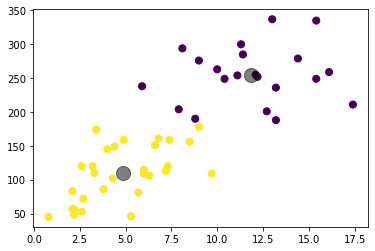

In [19]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s = 50, cmap="viridis");
plt.scatter(merkezler[:,0],merkezler[:,1],c="black", s=200 ,alpha=0.5);

## Optimum Küme Sayısının Belirlenmesi

### Elbow Yöntemi

In [20]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [22]:
ssd = []

K = range(1,51)

for k in K:
    kmeans = KMeans(n_clusters= k).fit(df)
    ssd.append(kmeans.inertia_)
    

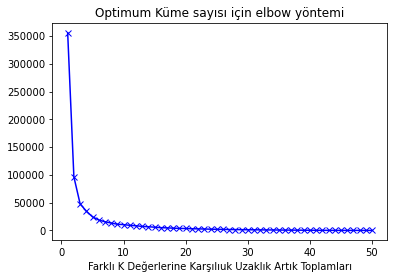

In [23]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılıuk Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için elbow yöntemi");

In [37]:
from yellowbrick.cluster import KElbowVisualizer

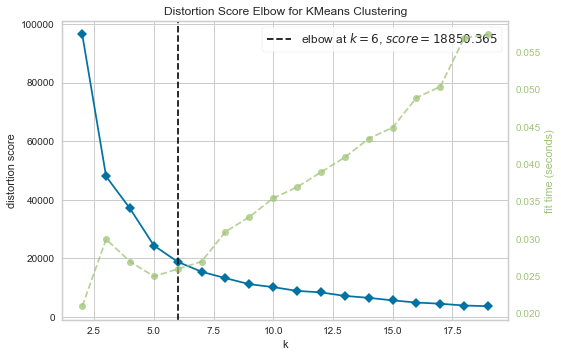

In [42]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2,20))
visu.fit(df)
visu.poof();

In [44]:
kmeans = KMeans(n_clusters= 4).fit(df)

In [45]:
kumeler = kmeans.labels_

In [46]:
pd.DataFrame({"Eyaletler": df.index,"Kumeler":kumeler})

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,1
4,California,0
5,Colorado,1
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,1


In [47]:
df["Kume_No"] = kumeler

In [48]:
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,1
